In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [6]:
X = load('../../preprocessing/clustering_data.joblib')

In [7]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [47]:
covariances = ['full', 'tied', 'diag', 'spherical']
silhouettes_cov = []

for covariance in covariances:
    gauss = GaussianMixture(n_components=2, covariance_type=covariance)
    gauss.fit(X)
    labels = gauss.predict(X)

    silhouettes_cov.append(silhouette_score(X, labels))

<BarContainer object of 4 artists>

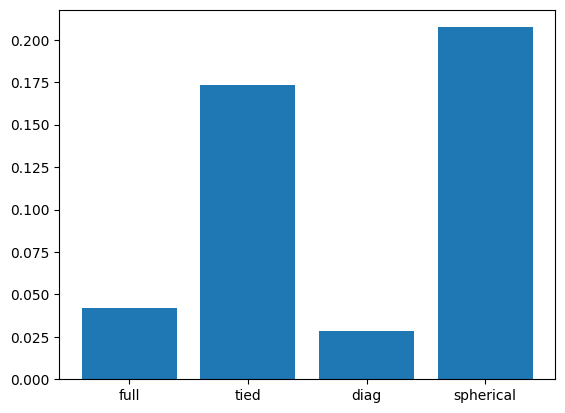

In [48]:
plt.bar(covariances, silhouettes_cov)

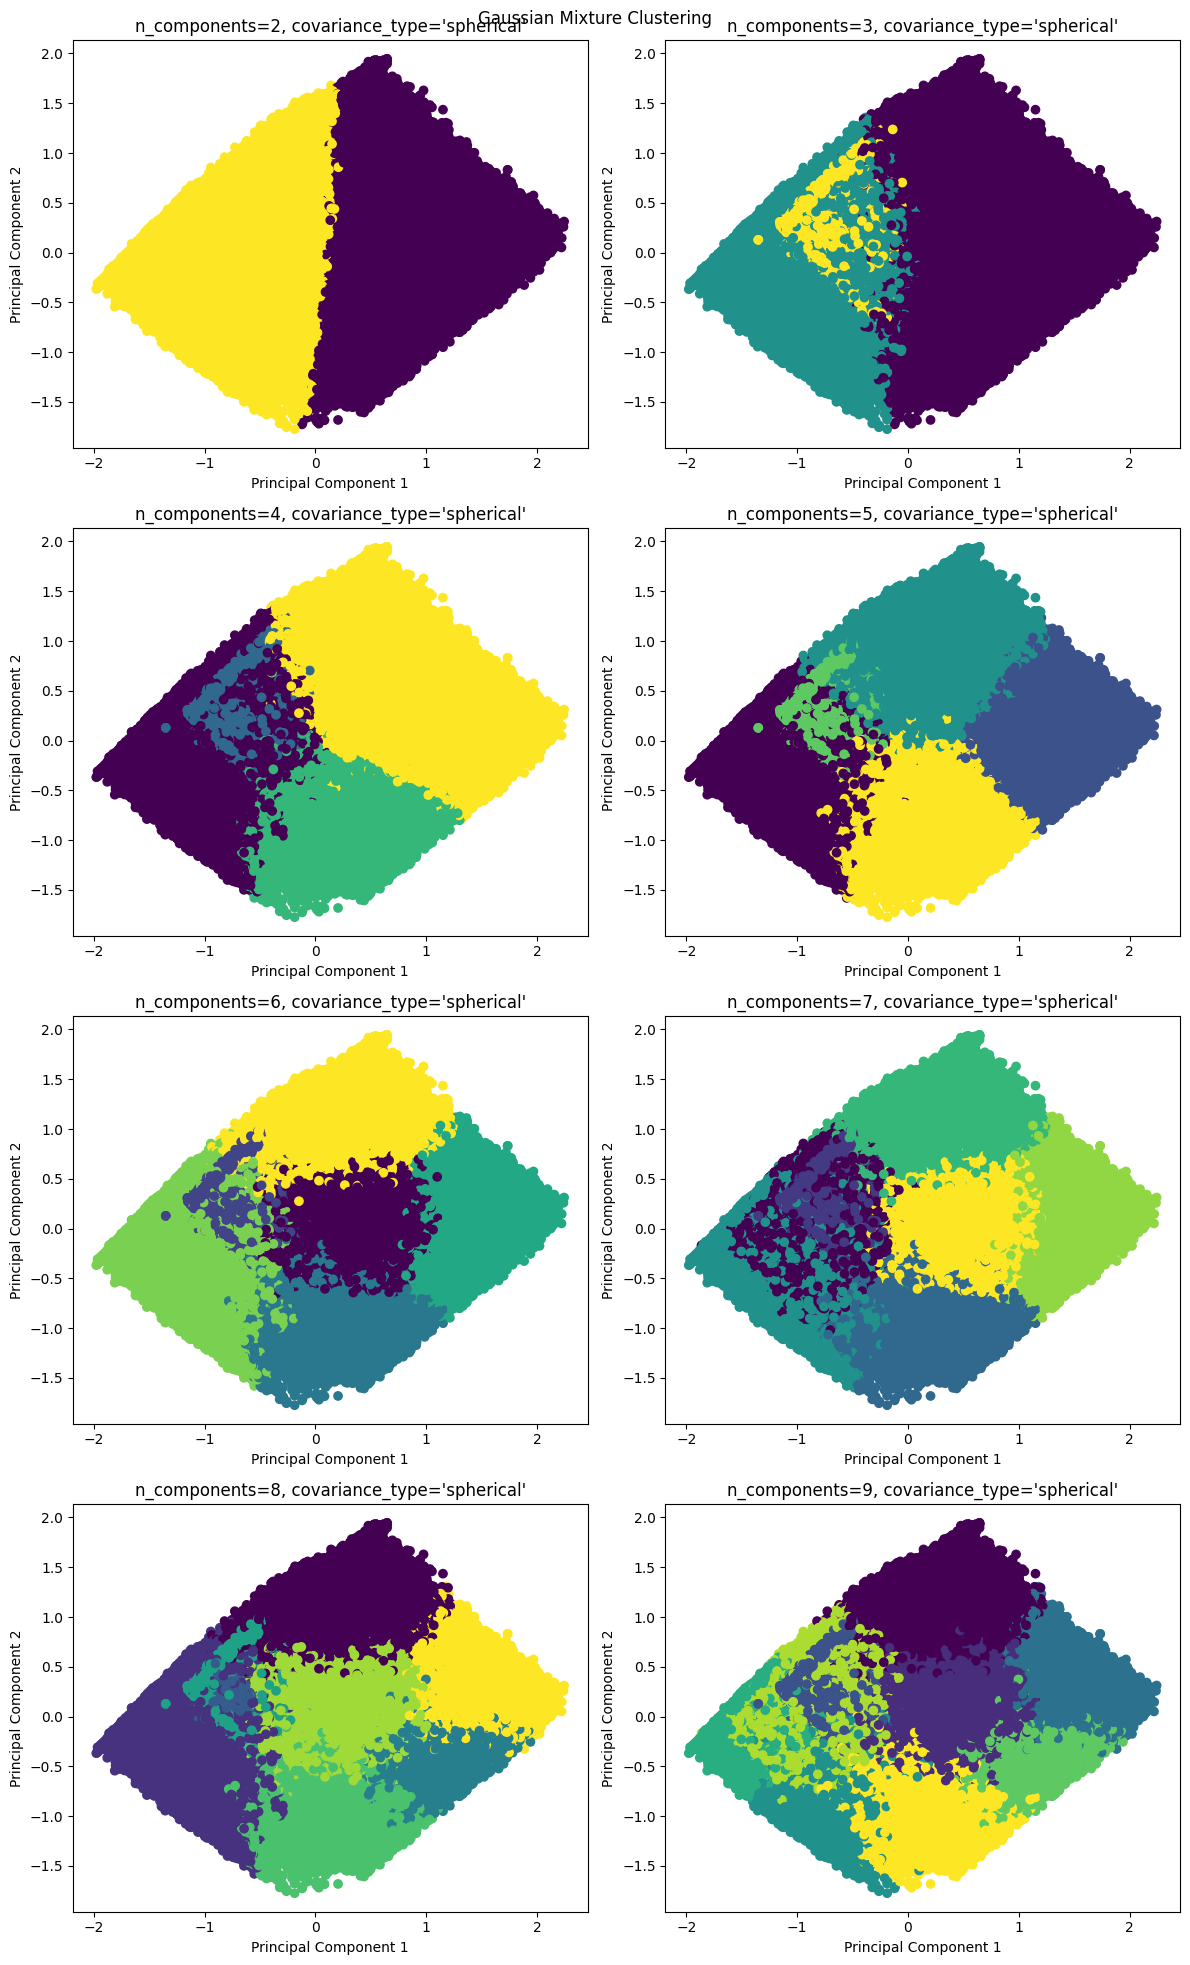

In [50]:
n_components = [i for i in range(2, 10)]
silhouettes_spherical = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='spherical')
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}, covariance_type='spherical'")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_spherical.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [51]:
silhouettes_spherical

[0.20732742735738202,
 0.20090927868490313,
 0.19571404773590562,
 0.20820211759741325,
 0.202597430321757,
 0.18578763444379837,
 0.12935256233219677,
 0.16846926420582564]

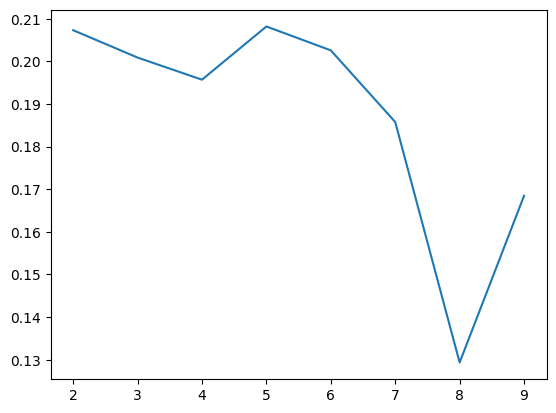

In [52]:
plt.plot(n_components, silhouettes_spherical)

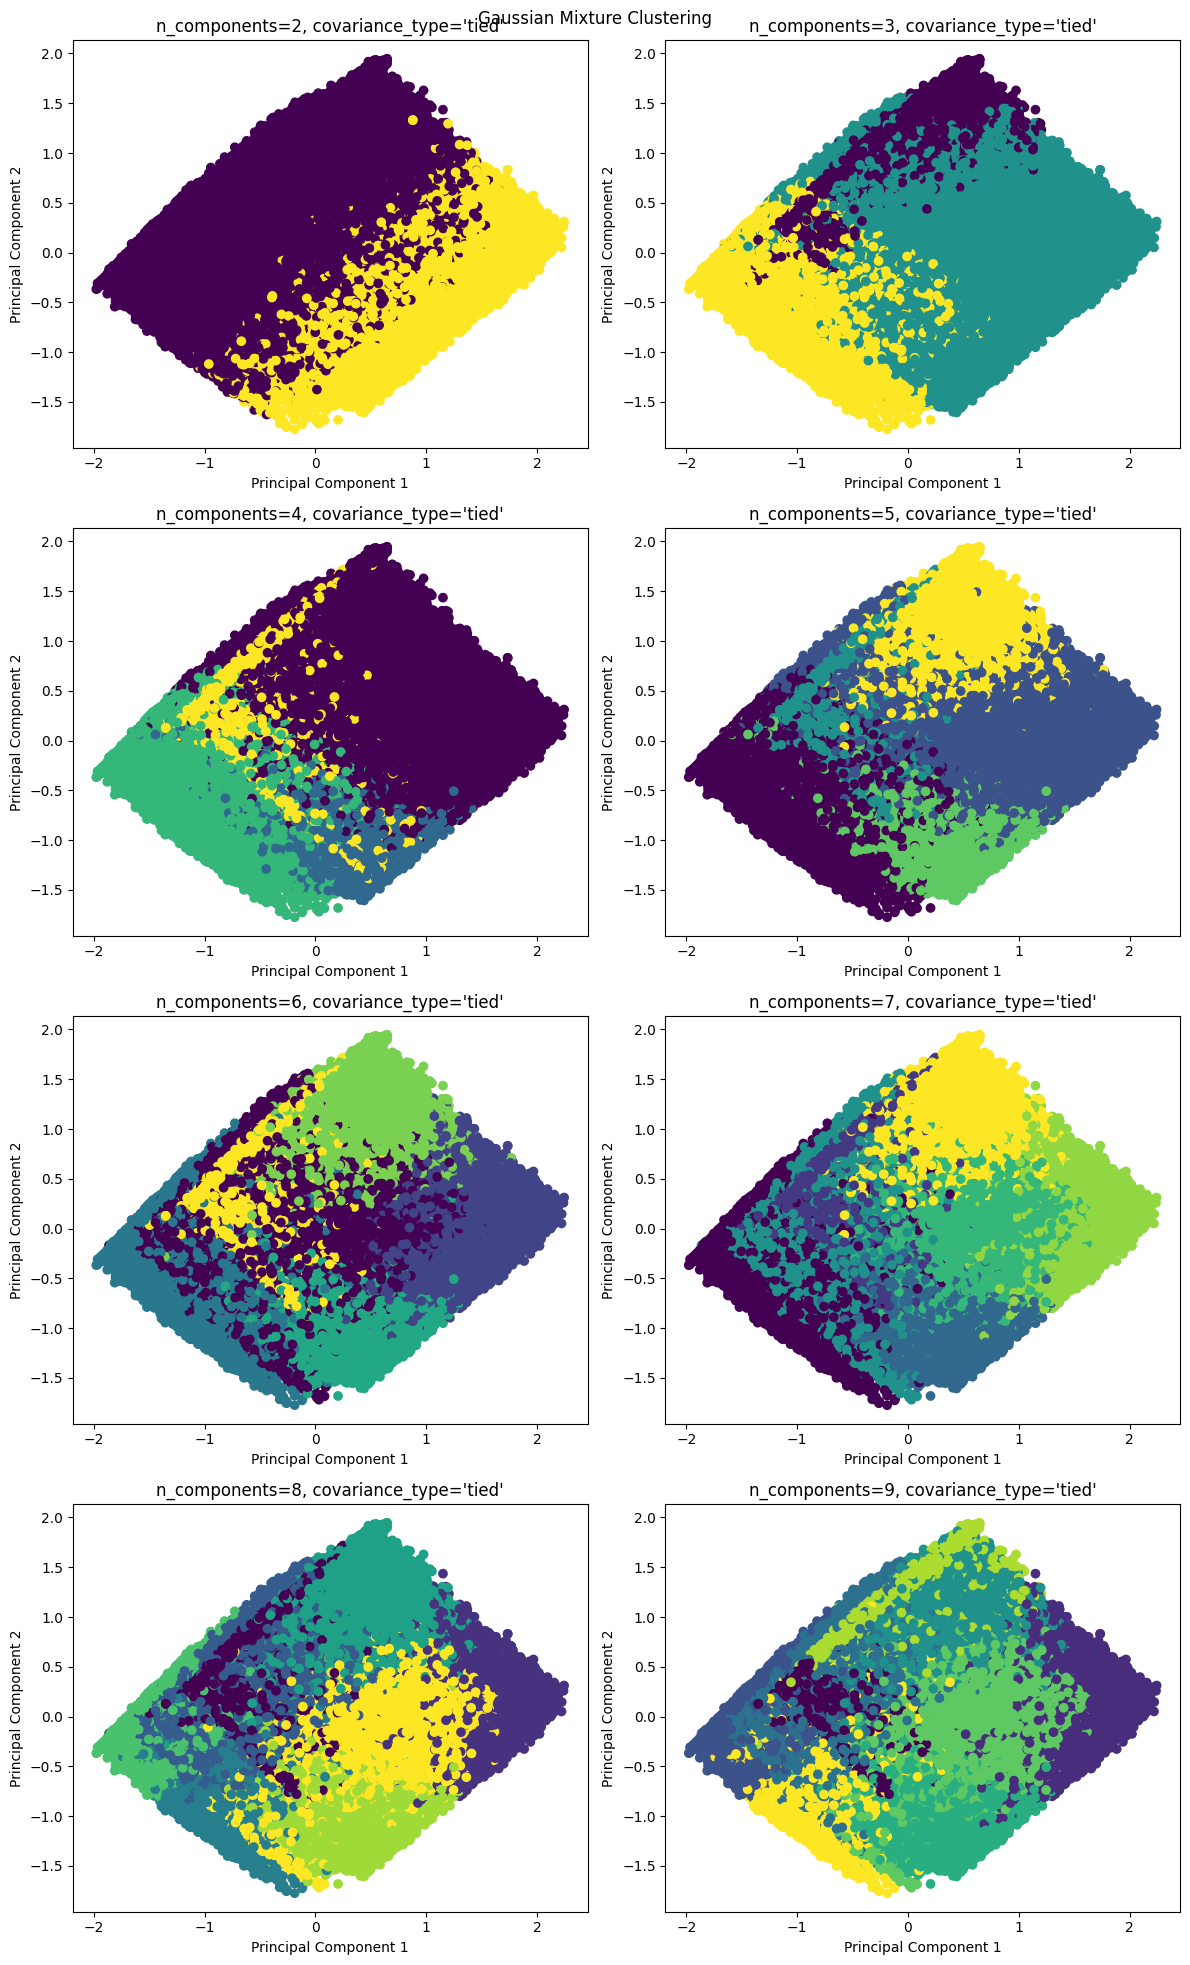

In [53]:
silhouettes_tied = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='tied')
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}, covariance_type='tied'")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_tied.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [54]:
silhouettes_tied

[0.17329598357647222,
 0.18018742056379305,
 0.17724923033530773,
 0.18559357142270505,
 0.18851013249987647,
 0.17922966255230777,
 0.1646126904248973,
 0.13975032125602807]

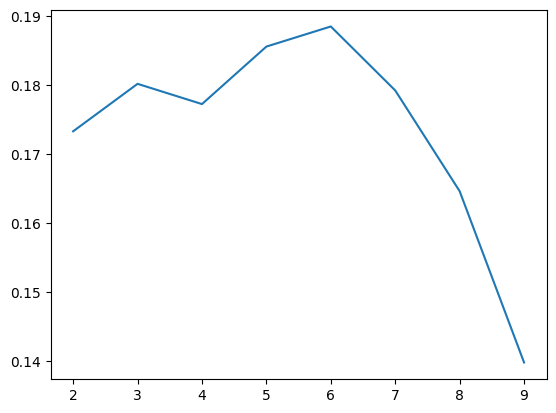

In [55]:
plt.plot(n_components, silhouettes_tied)